<h2>Imports</h2>

In [1]:
import numpy as np

<h2>1.) Dense Layer Class</h2>

![Dense Layer 1.jpg](<attachment:Dense Layer 1.jpg>)
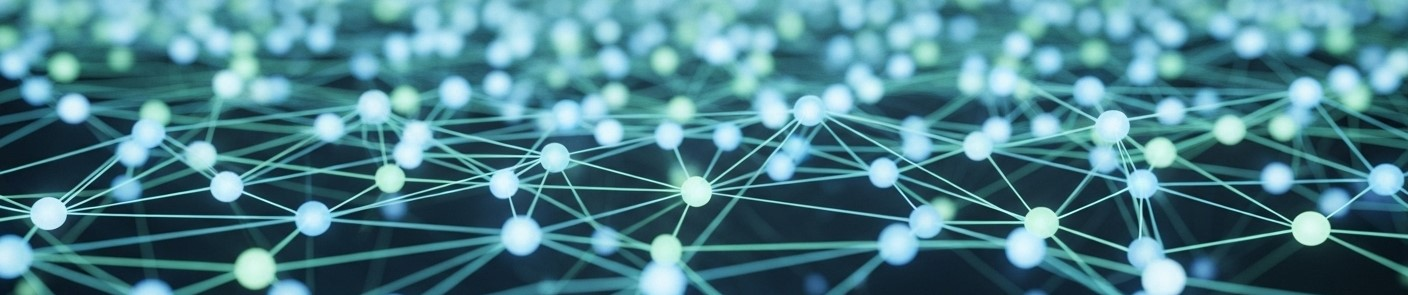

In [2]:
class Dense_Layer:
    def __init__(self, inputs, weights, bias):
        """
        Store inputs, weights, and bias for the layer
        """
        self.inputs = np.array(inputs)     # is the input vector
        self.weights = np.array(weights)   # is the weight matrix
        self.bias = np.array(bias)         # is the bias vector
    
    def weighted_sum(self):
        """
        Compute the weighted sum: Z = XW + B
        """
        return np.dot(self.inputs, self.weights) + self.bias

    def activation(self, z, function="relu"):
        """
        Apply activation function
        """
        if function == "relu":
            return np.maximum(0, z)
        elif function == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif function == "softmax":
            exp_z = np.exp(z - np.max(z))  # stability trick
            return exp_z / np.sum(exp_z)
        else:
            return z   # no activation

    def calculate_loss(self, predicted, target):
        """
        Calculate cross-entropy loss
        predicted: output from last layer (e.g. softmax probabilities)
        target: one-hot encoded true label
        """
        predicted = np.array(predicted)
        target = np.array(target)
        return -np.sum(target * np.log(predicted + 1e-9))  # +1e-9 avoids log(0)

<h2>2. a.) Iris Dataset</h2>

![Iris 1-2.jpg](<attachment:Iris 1-2.jpg>)
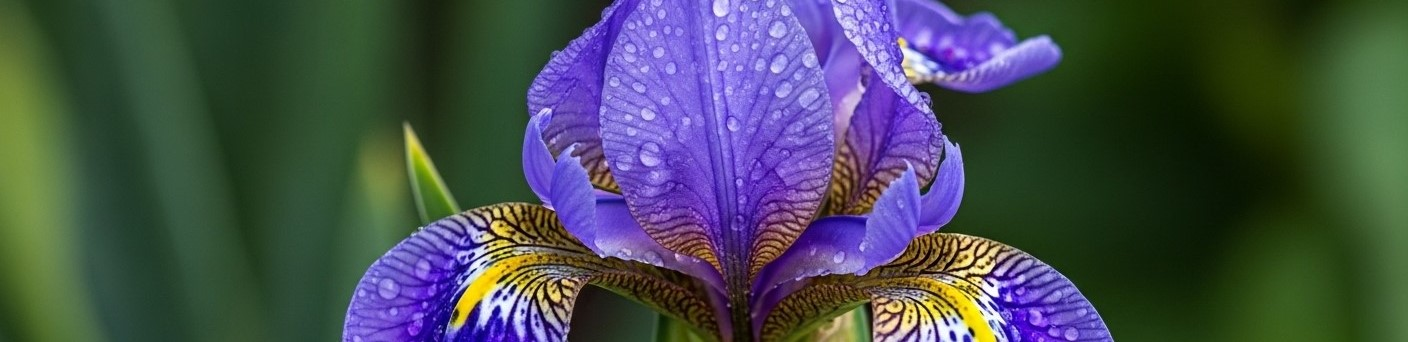

In [3]:
X = [5.1, 3.5, 1.4, 0.2]
target_output = [0.7, 0.2, 0.1]

W1 = [[0.2, 0.5, -0.3],
      [0.1, -0.2, 0.4],
      [-0.4, 0.3, 0.2],
      [0.6, -0.1, 0.5]]
B1 = [3.0, -2.1, 0.6]

In [4]:
layer1 = Dense_Layer(X, W1, B1)
z1 = layer1.weighted_sum()
out1 = layer1.activation(z1, "relu")
print("Layer 1 Output:", out1)

Layer 1 Output: [3.93 0.15 0.85]


In [5]:
W2 = [[0.3, -0.5],
      [0.7, 0.2],
      [-0.6, 0.4]]
B2 = [4.3, 6.4]

In [6]:
layer2 = Dense_Layer(out1, W2, B2)
z2 = layer2.weighted_sum()
out2 = layer2.activation(z2, "sigmoid")
print("Layer 2 Output:", out2)

Layer 2 Output: [0.99378157 0.99187781]


In [7]:
W3 = [[0.5, -0.3, 0.8],
      [-0.2, 0.6, -0.4]]
B3 = [-1.5, 2.1, -3.3]

In [8]:
layer3 = Dense_Layer(out2, W3, B3)
z3 = layer3.weighted_sum()
final_output = layer3.activation(z3, "softmax")
print("Final Output (Softmax probabilities):", final_output)

Final Output (Softmax probabilities): [0.0265075  0.96865119 0.00484132]


In [9]:
loss = layer3.calculate_loss(final_output, target_output)
print("Loss:", loss)

Loss: 3.080656357961251
